In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Stability plot of the Taylor Couette flow for m=0

The dynamical system.

In [2]:
def func(r,c,x):
    return np.array([-x[0]/r+c[1]*x[2]-(1j *c[2]/r)*x[1],
                     -x[1]/r+x[4],
                     x[5],
                     c[0]*x[0]+(c[2]**2/r**2+c[1]**2)*x[0]-2*C(r, c)*x[1]+1j*c[2]*(2*x[1]/r**2+C(r, c)*x[0]),
                     c[0]*x[1]+(2*c[2]**2/r**2+c[1]**2)*x[1]-2*D(r, c)*x[0]+1j*c[2]*(-2*x[0]/r**2+C(r, c)*x[1]+c[1]*x[2]/r-x[3]/r),
                     c[0]*x[2]+(c[2]**2/r**2+2*c[1]**2)*x[2]-x[5]/r-c[1]*x[3]+1j*c[2]*(-c[1]*x[1]/r+C(r, c)*x[2])])

def D(r, c): return (c[5]*c[3]-c[4])/(1+c[5])
def C(r, c): return -D(r, c)+(c[5]/(1-c[5]))*((c[3]-c[5]*c[4])/(1-c[5]**2))/r**2

The Runge-Kutta algorithm.

In [3]:
def RK(r,c,x0):

    k = np.zeros((4,6),dtype = 'complex64')
    x = np.zeros((r.size,6),dtype = 'complex64')
    x[0] = x0
    h = r[1]-r[0]

    for i in range(1, r.size):
        k[0] = func(r[i], c, x[i-1])
        k[1] = func(r[i], c, x[i-1]+h*k[0]/2)
        k[2] = func(r[i], c, x[i-1]+h*k[1]/2)
        k[3] = func(r[i], c, x[i-1]+h*k[2])

        x[i] = x[i-1]+h*(k[0]+2*k[1]+2*k[2]+k[3])/6
    return x

Declaring some variables.

In [4]:
a = 0.02911
b = 0.04445
o1 = 2.1
o2 = 0
nu = 0.000010003
d = b-a
r1 = a*o1*d/nu
r2 = b*o2*d/nu
eta = a/b
d
eta
r1
eta/(1-eta)
r2

0.015340000000000003

0.6548931383577052

93.74682995101472

1.8976531942633634

0.0

Newton's method solving for initial conditions to hit final point in radial evolution.

In [5]:
# sig, k, m, r1, r2, u, v, w, x, y, z
c = np.array([0, 3.3, 0, 50, r2, eta])
x0 = np.array([0, 0, 0, 1, 1, 1])
r = np.linspace(eta/(1-eta), 1/(1-eta), 500)
h = 0.01
lam = np.linspace(1,8,20)
x0a = np.zeros((len(lam),6))
ca = np.zeros(len(lam))
for i in range(len(lam)):
    c[1] = lam[i]
    x0 = np.array([0, 0, 0, 1, 1, 1])
    for j in range(4):
    
        yn = RK(r, c, x0)[-1,:3]
    
        h_arrc = np.array([0,0,0,h,0,0])
        yrn = (RK(r, c+h_arrc, x0)[-1,:3]-yn)/(h)
    
        h_arry = np.array([0,0,0,0,h,0])
        yyn = (RK(r, c, x0+h_arry)[-1,:3]-yn)/(h)
        
        h_arrz = np.array([0,0,0,0,0,h])
        yzn = (RK(r,c, x0+h_arrz)[-1,:3]-yn)/(h)
    
        J = np.matrix([[*yrn],[*yyn],[*yzn]]).T
        
        xn0 = x0[-2:]
        xn1 = xn0-(J**(-1)@yn).A1[-2:]
        x0 = np.array([0, 0, 0, 1, *xn1])
        #x0 = x0/np.linalg.norm(x0, ord=2)
        c[3] = c[3] - (J**(-1)@yn).A1[0]
    x0a[i] = x0
    ca[i] = c[3]

    # c[3]
    # x0
    # RK(r, c, x0)[-1]

/tmp/ipykernel_9975/3821930963.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  c[3] = c[3] - (J**(-1)@yn).A1[0]
/tmp/ipykernel_9975/3821930963.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  x0a[i] = x0


In [6]:
# c = np.array([0, 3, 0, 94, r2, eta])
# x0 = np.array([ 0,  0,  0,-1.62981451e-09,  3.27418093e-11, -9.54969437e-11])
# r = np.linspace(eta/(1-eta), 1/(1-eta), 5000)
nn = 7
y = RK(r, np.array([0, lam[nn], 0, ca[nn], r2, eta]), x0a[nn])
y

array([[ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
         1.0000000e+00+0.j,  2.7974531e-01+0.j,  4.8027641e-01+0.j],
       [ 3.4319914e-06+0.j,  5.6032103e-04+0.j,  9.5480273e-04+0.j,
         9.9995500e-01+0.j,  2.7975237e-01+0.j,  4.7262624e-01+0.j],
       [ 1.3650015e-05+0.j,  1.1200800e-03+0.j,  1.8943324e-03+0.j,
         9.9982065e-01+0.j,  2.7977297e-01+0.j,  4.6503389e-01+0.j],
       ...,
       [ 6.2942454e-06+0.j,  7.8335393e-04+0.j, -9.3528809e-04+0.j,
        -4.1329628e-01+0.j, -1.9511722e-01+0.j,  2.3042259e-01+0.j],
       [ 1.2462933e-06+0.j,  3.9194702e-04+0.j, -4.7074977e-04+0.j,
        -4.1329628e-01+0.j, -1.9510256e-01+0.j,  2.3319030e-01+0.j],
       [-4.4760009e-07+0.j,  8.3079794e-07+0.j, -6.4269989e-07+0.j,
        -4.1329628e-01+0.j, -1.9509754e-01+0.j,  2.3598020e-01+0.j]],
      dtype=complex64)

/home/caleb/Jupyter Lab/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/caleb/Jupyter Lab/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


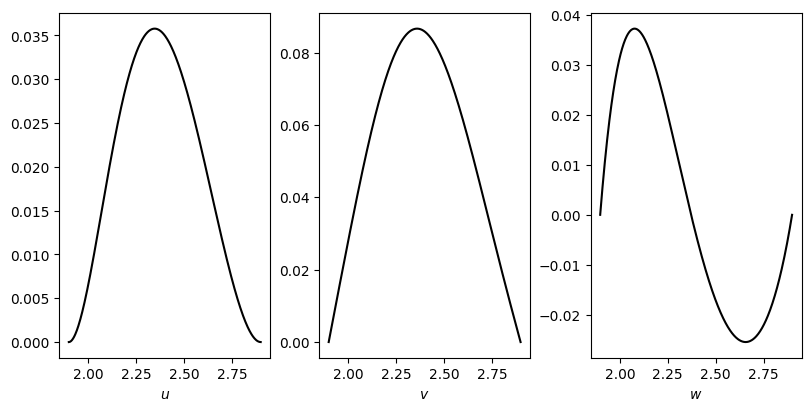

In [7]:
fig = plt.figure(figsize=(8,4), layout='constrained')
ax1 = fig.add_subplot(1, 3, 1, title='', xlabel='$u$', ylabel='', )
ax1.plot(r, y[:,0], color='black')
ax1 = fig.add_subplot(1, 3, 2, title='', xlabel='$v$', ylabel='', )
ax1.plot(r, y[:,1], color='black')
ax1 = fig.add_subplot(1, 3, 3, title='', xlabel='$w$', ylabel='', )
ax1.plot(r, y[:,2], color='black')

In [8]:
cheby = np.polynomial.chebyshev.Chebyshev
chebyfit = cheby.fit(lam,ca,8)
chebyfit.deriv(1).roots()
chebyfit.deriv(1).roots()[2]

array([2.08844158-1.48489667j, 2.08844158+1.48489667j,
       3.17580807+0.j        , 5.45665658-2.157101j  ,
       5.45665658+2.157101j  , 8.19453691-1.02744643j,
       8.19453691+1.02744643j])

(3.175808069318093+0j)

/home/caleb/Jupyter Lab/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


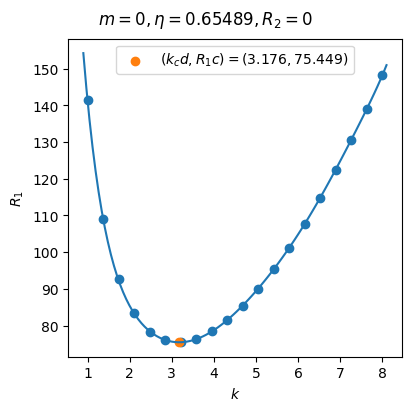

In [9]:
fig = plt.figure(figsize=(4,4), layout='constrained')
fig.suptitle(r'$m=0, \eta={0:1.5f}, R_2=0$'.format(eta))
ax1 = fig.add_subplot(1, 1, 1, title='', xlabel=r'$k$', ylabel=r'$R_1$', )
ax1.plot(np.linspace(0.9, 8.1, 100), chebyfit(np.linspace(0.9, 8.1, 100)))
ax1.scatter(lam, ca)
ax1.scatter(chebyfit.deriv(1).roots()[2], chebyfit(chebyfit.deriv(1).roots()[2]), 
            label=r'$(k_c d, R_1c) = ({0:1.3f}, {1:1.3f})$'.format(np.real(chebyfit.deriv(1).roots()[2]), np.real(chebyfit(chebyfit.deriv(1).roots()[2]))))
ax1.legend()
plt.show;

## Plotting $R_2$ vs $R_1$ critical lines

In [10]:
a = 0.02911
b = 0.04445
o1 = 2.1
o2 = 0
nu = 0.000010003
d = b-a
r1 = a*o1*d/nu
r2 = -100
eta = a/b
d
eta
r1
eta/(1-eta)
r2

0.015340000000000003

0.6548931383577052

93.74682995101472

1.8976531942633634

-100

In [11]:
# sig, k, m, r1, r2, u, v, w, x, y, z
c = np.array([0, 3.3, 0, 50, r2, eta])
x0 = np.array([0, 0, 0, 1, 1, 1])
r = np.linspace(eta/(1-eta), 1/(1-eta), 250)
h = 0.01
lam = np.linspace(1,8,20)
r2 = np.linspace(0,-100,10)
x0a = np.zeros((len(r2),len(lam),6))
ca = np.zeros((len(r2),len(lam)))
for k in range(len(r2)):
    c[4] = r2[k]
    for i in range(len(lam)):
        c[1] = lam[i]
        x0 = np.array([0, 0, 0, 1, 1, 1])
        for j in range(5):
        
            yn = RK(r, c, x0)[-1,:3]
        
            h_arrc = np.array([0,0,0,h,0,0])
            yrn = (RK(r, c+h_arrc, x0)[-1,:3]-yn)/(h)
        
            h_arry = np.array([0,0,0,0,h,0])
            yyn = (RK(r, c, x0+h_arry)[-1,:3]-yn)/(h)
            
            h_arrz = np.array([0,0,0,0,0,h])
            yzn = (RK(r,c, x0+h_arrz)[-1,:3]-yn)/(h)
        
            J = np.matrix([[*yrn],[*yyn],[*yzn]]).T
            
            xn0 = x0[-2:]
            xn1 = xn0-(J**(-1)@yn).A1[-2:]
            x0 = np.array([0, 0, 0, 1, *xn1])
            #x0 = x0/np.linalg.norm(x0, ord=2)
            c[3] = c[3] - (J**(-1)@yn).A1[0]
        x0a[k,i] = x0
        ca[k,i] = c[3]

/tmp/ipykernel_9975/3388875056.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  c[3] = c[3] - (J**(-1)@yn).A1[0]
/tmp/ipykernel_9975/3388875056.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x0a[k,i] = x0


In [12]:
# c = np.array([0, 3, 0, 94, r2, eta])
# x0 = np.array([ 0,  0,  0,-1.62981451e-09,  3.27418093e-11, -9.54969437e-11])
# r = np.linspace(eta/(1-eta), 1/(1-eta), 5000)
nn = 7
nm = 7
y = RK(r, np.array([0, lam[nm], 0, ca[nn, nm], r2[nm], eta]), x0a[nn, nm])
y

array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         1.00000000e+00+0.j,  4.11108911e-01+0.j,  3.87304336e-01+0.j],
       [ 1.10249075e-05+0.j,  1.64935179e-03+0.j,  1.52506388e-03+0.j,
         9.99642372e-01+0.j,  4.11148727e-01+0.j,  3.72209787e-01+0.j],
       [ 4.34902540e-05+0.j,  3.29553895e-03+0.j,  2.98990216e-03+0.j,
         9.98583019e-01+0.j,  4.11257893e-01+0.j,  3.57312530e-01+0.j],
       ...,
       [-2.84743419e-06+0.j,  1.08172826e-03+0.j,  1.45352838e-04+0.j,
         1.30304411e-01+0.j, -1.34184346e-01+0.j, -1.64184403e-02+0.j],
       [-1.24705434e-06+0.j,  5.41805057e-04+0.j,  7.57253583e-05+0.j,
         1.30478203e-01+0.j, -1.34141207e-01+0.j, -1.82572324e-02+0.j],
       [-7.02090347e-07+0.j,  2.74687773e-06+0.j, -1.30057742e-06+0.j,
         1.30536839e-01+0.j, -1.34126574e-01+0.j, -2.01027188e-02+0.j]],
      dtype=complex64)

In [13]:
cheby = np.polynomial.chebyshev.Chebyshev
ks = np.zeros(len(r2))
r1s = np.zeros(len(r2))
for i in range(len(r2)):
    chebyfit = cheby.fit(lam,abs(ca[i]),8)
    #chebyfit.deriv(1).roots()
    ks[i] = chebyfit.deriv(1).roots()[2]
    r1s[i] = chebyfit(ks[i])

/tmp/ipykernel_9975/521385836.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  ks[i] = chebyfit.deriv(1).roots()[2]


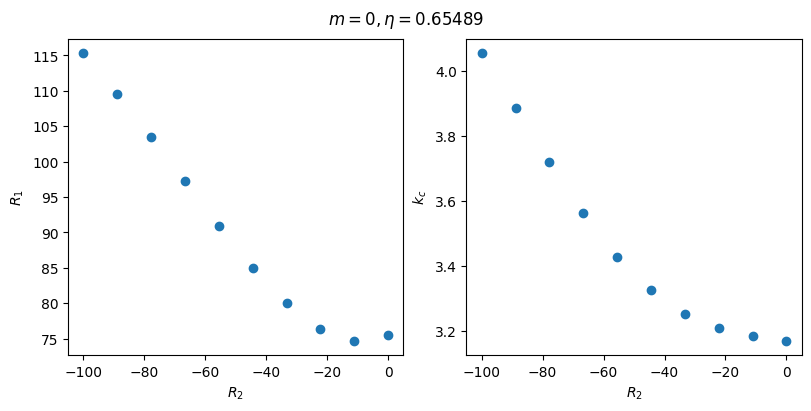

In [14]:
fig = plt.figure(figsize=(8,4), layout='constrained')
fig.suptitle(r'$m=0, \eta={0:1.5f}$'.format(eta))
ax1 = fig.add_subplot(1, 2, 1, title='', xlabel=r'$R_2$', ylabel=r'$R_1$', )
ax2 = fig.add_subplot(1, 2, 2, title='', xlabel=r'$R_2$', ylabel=r'$k_c$', )
ax1.scatter(r2, r1s)
ax2.scatter(r2, ks)
plt.show;